In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
def create_normal_sine(time_len):
    x = np.linspace(0, 2 * np.pi, 50)
    noise = np.random.normal(0,1, time_len)
    return 10*np.sin(np.tile(x, int(time_len/50))) + noise
    

## Create Sinus Curve with Gausian Noise

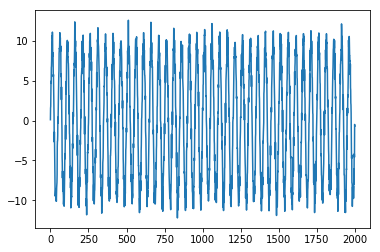

In [16]:
# Create Sine Wave
sinewave = create_normal_sine(2000)
time = range(len(sinewave))

# Plot Sine Wave
plt.plot(sinewave)
plt.show()

# Save Sine Wave as .csv
#df = pd.DataFrame(data={"time":time, "value":sinewave})
#df.to_csv("./sine_wave.csv", index=False, sep=";")

## Create Sinus Curve with several Errors
Errors will be:
- a higher level of noise
- an increase in sinusoidal amplitude
- a higher frequency
- a lower frequency
- an offset
- the interruption of the signal.

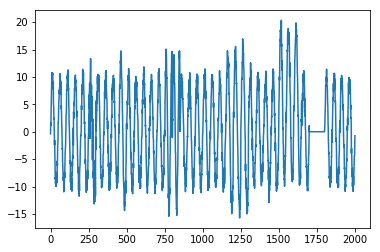

2000


In [15]:
# Create Signal with errors
sine_with_error = []

# 0 - 499: no error
sine_with_error.append(create_normal_sine(250))

# 500 - 699: higher level of noise
x = np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 50)
sine_with_error.append(10*np.sin(np.tile(x, 1)) + 3*noise)

# 700 - 999: no error
sine_with_error.append(create_normal_sine(150))

# 1000 - 1099: increase in amplitude
noise = np.random.normal(0,1, 50)
sine_with_error.append(14*np.sin(np.tile(x, 1)) + noise)

# 1100 - 1599: no error
sine_with_error.append(create_normal_sine(250))

# 1600 - 1999: higher frequency 
x = 1.3*np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 100)
sine_with_error.append(14*np.sin(np.tile(x, 2)) + noise)

# 2000 - 2999: no error
sine_with_error.append(create_normal_sine(300))

# 3000 - 3299: lower frequency 
x = 0.9*np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 150)
sine_with_error.append(14*np.sin(np.tile(x, 3)) + noise)

# 3300 - 3699: no error
sine_with_error.append(create_normal_sine(200))

# 3700 - 3999: offset
x = np.linspace(0, 2 * np.pi, 50)
noise = np.random.normal(0,1, 150)
sine_with_error.append(14*np.sin(np.tile(x, 3)) + noise + 5)

# 4000 - 4099: no error
sine_with_error.append(create_normal_sine(50))

# 4100 - 4299: no signal
sine_with_error.append(np.zeros(100))

# 4200 - 4999: no error
sine_with_error.append(create_normal_sine(200))

# Concatenate intervals to one signal 
signal = []
# Plot Sine Wave
for i in sine_with_error:
    signal = np.concatenate((signal, i), axis=None)
plt.plot(signal)
plt.show()
print(len(signal))
# Save Sine Wave as .csv
#df = pd.DataFrame(data={"time":time, "value":sinewave})
#df.to_csv("./sine_wave_errors.csv", index=False, sep=";")